<img src="ku_logo_uk_v.png" alt="drawing" width="130" style="float:right"/>

# <span style="color:#2c061f"> Week 8 </span>  

<br>

## <span style="color:#374045"> Introduction to Programming and Numerical Analysis </span>


####  <span style="color:#d89216"> <br> Simon Guldager </span>

## Plan for today
<br>

1. Inaugural project feedback
2. Data project 
3. Pandas stuff
4. Split, Apply, Combine

# 1. Inaugural project feedback
Feedback for your project will be via email.  
I will probably only sent an email to one member of every group.

# 2. Data project

You are basically free to do whatever you want. You just have to show that your are able to do some analysis of the data in Python.

Theme inspiration: 
- Danish foreign trade
- Demographic changes
- Covid-19

Whatever you choose the most important thing is to convey a story using data. 

# 2. Data project

Next week we will work on the data project in class!

# 2.1 Minimum requirements

There will be some minimum requirements for the project. You should show in the project that you can: 
1. Apply data cleaning and data structuring methods
2. Apply data analysis methods
3. Structure a code project
4. Document code
5. Present results in text form and in figures

# 3. Pandas!

Pandas is a really powerful data science library that you likely will encounter a lot. Pandas is built on top of the NumPy package, meaning a lot of the structure of NumPy is used or replicated in Pandas. 

The core element of Pandas is the `DataFrame`. Looks like a 'classic' dataset and can store heterogeneous tabular data. The `DataFrame` is a `Class` with many methods!  Let's import packages:

In [81]:
import pandas as pd
import numpy as np

DataFrames can be loaded from pre-existing data (CSV, Excel, STATA, SAS, HTML, txt etc.) or from list and dictionaries:

In [36]:
np.random.seed(666)
N = 50
log_dist = np.exp(np.random.normal(size=N))

data = {'income':  log_dist * 5, 'rent': log_dist * 2, 'consumption': log_dist * 1.3}

df = pd.DataFrame(data)
df.head(10)

,income,rent,consumption
0,11.400144,4.560058,2.964037
1,8.080097,3.232039,2.100825
2,16.165930,6.466372,4.203142
3,12.409794,4.963918,3.226546
4,2.822764,1.129106,0.733919
5,4.481423,1.792569,1.165170
6,5.096052,2.038421,1.324974
7,1.945807,0.778323,0.505910
8,9.487841,3.795136,2.466839
9,2.277310,0.910924,0.592100


# 3.1 Creating a new variable

In [82]:
df['savings'] = df['income'] - df['rent'] - df['consumption']
df.head(10)

,income,rent,consumption,savings
0,11.400144,4.560058,2.964037,3.876049
1,8.080097,3.232039,2.100825,2.747233
2,16.165930,6.466372,4.203142,5.496416
3,12.409794,4.963918,3.226546,4.219330
4,2.822764,1.129106,0.733919,0.959740
5,4.481423,1.792569,1.165170,1.523684
6,5.096052,2.038421,1.324974,1.732658
7,1.945807,0.778323,0.505910,0.661574
8,9.487841,3.795136,2.466839,3.225866
9,2.277310,0.910924,0.592100,0.774285


# 3.2 Subsetting DataFrame
Sometimes you only need specific parts of a DataFrame. To subset often the `.loc` method is used:

In [83]:
df_sub = df.loc[df["income"] > 10]
df_sub = df_sub.reset_index(drop=True)
df_sub

,income,rent,consumption,savings
0,11.400144,4.560058,2.964037,3.876049
1,16.165930,6.466372,4.203142,5.496416
2,12.409794,4.963918,3.226546,4.219330
3,13.298619,5.319447,3.457641,4.521530
4,11.635614,4.654245,3.025260,3.956109
5,11.732226,4.692891,3.050379,3.988957
6,18.542690,7.417076,4.821099,6.304515
7,23.412768,9.365107,6.087320,7.960341
8,12.262681,4.905073,3.188297,4.169312
9,15.183413,6.073365,3.947687,5.162360


In [39]:
I = df["income"] > 10
df_sub = df.loc[I]
df_sub = df_sub.reset_index(drop=True)
df_sub

,income,rent,consumption,savings
0,11.400144,4.560058,2.964037,3.876049
1,16.165930,6.466372,4.203142,5.496416
2,12.409794,4.963918,3.226546,4.219330
3,13.298619,5.319447,3.457641,4.521530
4,11.635614,4.654245,3.025260,3.956109
5,11.732226,4.692891,3.050379,3.988957
6,18.542690,7.417076,4.821099,6.304515
7,23.412768,9.365107,6.087320,7.960341
8,12.262681,4.905073,3.188297,4.169312
9,15.183413,6.073365,3.947687,5.162360


# 3.3  Accessing columns
Many ways to access columns:

In [40]:
#df_sub = df["income"]
#df_sub = df.income
#df_sub = df.loc[:,["income"]]
#df_sub = df.iloc[:,0]
df_sub

,income,rent,consumption,savings
0,11.400144,4.560058,2.964037,3.876049
1,16.165930,6.466372,4.203142,5.496416
2,12.409794,4.963918,3.226546,4.219330
3,13.298619,5.319447,3.457641,4.521530
4,11.635614,4.654245,3.025260,3.956109
5,11.732226,4.692891,3.050379,3.988957
6,18.542690,7.417076,4.821099,6.304515
7,23.412768,9.365107,6.087320,7.960341
8,12.262681,4.905073,3.188297,4.169312
9,15.183413,6.073365,3.947687,5.162360


# 3.4 More subsetting 
Only want specific columns? Provide a list of column names: 

In [41]:
df_sub = df.loc[:, ["income","rent"]]
df_sub = df_sub.reset_index(drop=True)
df_sub = df.loc[I, ["income","rent"]]
df_sub.head(10)

,income,rent
0,11.400144,4.560058
2,16.165930,6.466372
3,12.409794,4.963918
12,13.298619,5.319447
21,11.635614,4.654245
23,11.732226,4.692891
25,18.542690,7.417076
26,23.412768,9.365107
38,12.262681,4.905073
41,15.183413,6.073365


# 3.5 Pandas 'warning' when working in Jupyter

Remember that the Jupyter kernel stores variables, so changes in one cell affect the same variable in other cells. This may lead to problems when working with dataframes

Let's create a simple dataframe as an example

In [60]:
import pandas as pd
df1 = pd.DataFrame(
    {
        "A": list(range(5)),
        "B": list(range(5)),
        "C": list(range(5)),
        "D": list(range(5)),
    })
df1

,A,B,C,D
0,0,0,0,0
1,1,1,1,1
2,2,2,2,2
3,3,3,3,3
4,4,4,4,4


We remove rows where 'A' is larger than 2: This ONLY works if 'A' is actually a column

In [63]:
I = df1['A'] > 1
df1 = df1[I]
df1

KeyError: 'A'

Removing 'A' column, this will break the preveous code

In [62]:
df1 = df1.drop(columns = ['A'])
df1

,B,C,D
2,2,2,2
3,3,3,3
4,4,4,4


# 4. Split-apply-combine
Walkthrough of a piece of code you will see in the problem set

In [45]:
import pydst
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import pandas as pd
dst = pydst.Dst(lang='en')

columns_dict = {}
columns_dict['TRANSAKT'] = 'variable'
columns_dict['PRISENHED'] = 'unit'
columns_dict['TID'] = 'year'
columns_dict['INDHOLD'] = 'value'

var_dict = {} # var is for variable
var_dict['P.1 Output'] = 'Y'
var_dict['P.3 Final consumption expenditure'] = 'C'
var_dict['P.3 Government consumption expenditure'] = 'G'
var_dict['P.5 Gross capital formation'] = 'I'
var_dict['P.6 Export of goods and services'] = 'X'
var_dict['P.7 Import of goods and services'] = 'M'

unit_dict = {}
unit_dict['2010-prices, chained values'] = 'real'
unit_dict['Current prices'] = 'nominal'

nah1 = dst.get_data(table_id = 'NAH1', variables={'TRANSAKT':'*', 'PRISENHED':'*', 'TID':'*'})

nah1_true = nah1.copy()
nah1_true.rename(columns=columns_dict,inplace=True)

# c. replace data
for key,value in var_dict.items():
    nah1_true.variable.replace(key,value,inplace=True)

for key,value in unit_dict.items():
    nah1_true.unit.replace(key,value,inplace=True)
    
I = nah1_true["variable"].isin(list(var_dict.values()))
nah1_true = nah1_true.loc[I]

# e. convert values to numeric
nah1_true.value = nah1_true.value.astype('float')

nah_copy = nah1_true.copy()

# split
nah1_true = nah1_true.sort_values(by=['year'], ascending = True)
nah1_true_grouped = nah1_true.groupby(['variable','unit'])
nah1_true_grouped_first = nah1_true_grouped.value.first()
nah1_true_grouped_first.name = 'first'

# b. apply
nah1_true.set_index(['variable','unit','year'],inplace=True)
nah1_true = nah1_true.join(nah1_true_grouped_first,how='left',on=['variable','unit'])
nah1_true.reset_index(inplace=True)

# c. combine
nah1_true['indexed'] = nah1_true['value']/nah1_true['first']

# d. plot
def plot(df):
    df_indexed = df.set_index('year')
    I = df_indexed.unit == 'real'
    df_indexed[I].groupby(['variable'])['indexed'].plot(legend=True);

National accounting data, for GDP, consumption, investments etc.

In [46]:
nah = nah_copy.copy()
nah

,variable,unit,year,value
6,Y,real,1968,1162778.0
7,Y,nominal,1968,167877.0
22,C,real,1968,612327.0
23,C,nominal,1968,77325.0
24,G,real,1968,195664.0
...,...,...,...,...
3335,I,nominal,2017,483615.0
3344,X,real,2017,1175129.0
3345,X,nominal,2017,1207825.0
3350,M,real,2017,1036756.0


Lets say we want to create an index chart, to see which variable grew the most over the period.  

This is not trivial: We have to somehow find and save the value in year 1 for all variables to create the index.  

1. **Split** the data into groups by variable (Y, C, I, etc.) and unit (real vs. nominal)
2. **Apply**: find the value in year 1 for each group
3. **Combine**: join the values in the first year with the original dataset, such that every row keeps the value in year 1

## Split

In [65]:
nah = nah.sort_values(by=['year'], ascending = True)
nah_grouped = nah.groupby(['variable','unit']) # nah_grouped is a "group element"
# this part is not necesarry it's just for show
num = 0
for i, j in nah_grouped: # this loop goes over every group
    num += 1
    print(i)
    print(j[:5])
    if num > 4:
        break

('C', 'nominal')
    variable     unit  year    value
323        C  nominal  1966  62576.0
143        C  nominal  1967  69877.0
23         C  nominal  1968  77325.0
508        C  nominal  1969  86753.0
568        C  nominal  1970  97441.0
('C', 'real')
    variable  unit  year     value
322        C  real  1966  549491.0
142        C  real  1967  588094.0
22         C  real  1968  612327.0
507        C  real  1969  649337.0
567        C  real  1970  671805.0
('G', 'nominal')
    variable     unit  year    value
325        G  nominal  1966  14768.0
145        G  nominal  1967  16933.0
25         G  nominal  1968  19734.0
510        G  nominal  1969  22854.0
570        G  nominal  1970  26845.0
('G', 'real')
    variable  unit  year     value
324        G  real  1966  171307.0
144        G  real  1967  184983.0
24         G  real  1968  195664.0
509        G  real  1969  209375.0
569        G  real  1970  222350.0
('I', 'nominal')
    variable     unit  year    value
335        I  nomina

## Apply

In [48]:
nah_grouped_first = nah_grouped.value.first() # takes the first value in the group and creates a data series
nah_grouped_first.name = 'first' # we give the series a name, necesarry for join
nah_grouped_first

variable  unit   
C         nominal      62576.0
          real        549491.0
G         nominal      14768.0
          real        171307.0
I         nominal      21134.0
          real        127630.0
M         nominal      24406.0
          real        112171.0
X         nominal      23110.0
          real        123594.0
Y         nominal     144582.0
          real       1089347.0
Name: first, dtype: float64

## Combine

In [67]:
# c. combine
nah.set_index(['variable','unit','year'],inplace=True) # .join needs an index
nah = nah.join(nah_grouped_first, how='left',on=['variable','unit']) # on=['variable','unit']
# nah_grouped_first is joined with nah where variable and unit match variable and unit in the group
nah.reset_index(inplace=True)

nah['indexed'] = nah['value'] / nah['first']
nah

,variable,unit,year,value,first,indexed
0,C,real,1966,549491.0,549491.0,1.000000
1,I,real,1966,127630.0,127630.0,1.000000
2,Y,nominal,1966,144582.0,144582.0,1.000000
3,C,nominal,1966,62576.0,62576.0,1.000000
4,G,nominal,1966,14768.0,14768.0,1.000000
...,...,...,...,...,...,...
667,X,real,2021,1279017.0,123594.0,10.348536
668,M,real,2021,1164408.0,112171.0,10.380651
669,G,real,2021,536987.0,171307.0,3.134647
670,X,nominal,2021,1487151.0,23110.0,64.350974


In [68]:
df_indexed = nah.set_index('year')
I = df_indexed.unit == 'real'
df_indexed
#df_indexed[I].groupby(['variable'])['indexed'].plot(legend=True);

,variable,unit,value,first,indexed
year,,,,,
1966,C,real,549491.0,549491.0,1.000000
1966,I,real,127630.0,127630.0,1.000000
1966,Y,nominal,144582.0,144582.0,1.000000
1966,C,nominal,62576.0,62576.0,1.000000
1966,G,nominal,14768.0,14768.0,1.000000
...,...,...,...,...,...
2021,X,real,1279017.0,123594.0,10.348536
2021,M,real,1164408.0,112171.0,10.380651
2021,G,real,536987.0,171307.0,3.134647


## Usefull resources

Merging guide: https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

## Another way of doing Split, Apply, Combine! (maybe easier)

In [73]:
nah = nah_copy.copy() # copy of data from statistics Denmark
nah = nah.sort_values(by=['year'], ascending = True)
nah

,variable,unit,year,value
322,C,real,1966,549491.0
307,Y,nominal,1966,144582.0
323,C,nominal,1966,62576.0
324,G,real,1966,171307.0
325,G,nominal,1966,14768.0
...,...,...,...,...
1655,I,nominal,2021,581922.0
1664,X,real,2021,1279017.0
1670,M,real,2021,1164408.0
1645,G,nominal,2021,608686.0


In [74]:
year1_df = nah[nah['year'] == 2015] # dataframe only with data in year1
year1_df = year1_df.loc[:, ['variable', 'unit', 'value']] # remove year, we don't want to merge on it
year1_df

,variable,unit,value
2030,M,real,959972.0
2014,I,real,400705.0
2031,M,nominal,990281.0
2015,I,nominal,420125.0
2003,C,nominal,1478001.0
2002,C,real,1413235.0
1987,Y,nominal,3549922.0
1986,Y,real,3368200.0
2005,G,nominal,518644.0
2004,G,real,513801.0


In [80]:
result = nah.merge(year1_df, on=["variable", "unit"])
result # since there's a 'value' column in both, pandas names them _x and _y
#result.rename(columns = {'value_x': 'value', 'value_y': 'first'})

,variable,unit,year,value_x,value_y
0,C,real,1966,549491.0,1413235.0
1,C,real,1967,588094.0,1413235.0
2,C,real,1968,612327.0,1413235.0
3,C,real,1969,649337.0,1413235.0
4,C,real,1970,671805.0,1413235.0
...,...,...,...,...,...
667,I,nominal,2017,483615.0,420125.0
668,I,nominal,2018,509233.0,420125.0
669,I,nominal,2019,509144.0,420125.0
670,I,nominal,2020,534075.0,420125.0


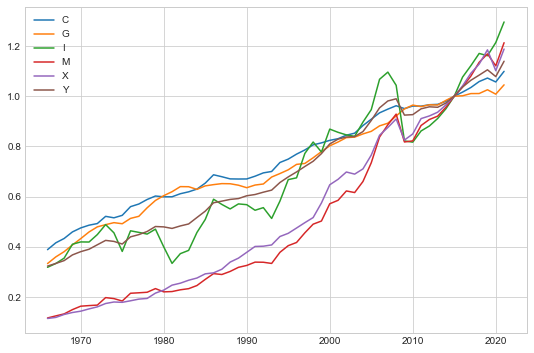

In [78]:
result['index'] = result['value_x'] / result['value_y']

fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(1,1,1)

J = result['unit'] == 'real'
#years = result['year'].unique()
for i, j in result[J].groupby(['variable']):
    # i is the name of a given group
    # j is the data
    ax.plot(j['year'], j['index'], label = f'{i}')
ax.legend()